In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
import os
import random
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# data download and observation
# dataset = '/content/drive/MyDrive/dataset'
# os.chdir(dataset)
# dataset
# os.listdir('/content/drive/MyDrive/dataset')
# data_dir_list = os.listdir('/content/drive/MyDrive/dataset')
# print(data_dir_list)
# OG_dataset_dir = 'dataset'

In [3]:
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [57]:
# Lista de clases
classes = ['stars', 'planets', 'nebulas', 'blackholes', 'meteors-asteroids', 'galaxies']

In [ ]:
# Directorio principal
OG_dataset = '/content/dataset/'
os.makedirs(OG_dataset, exist_ok=True)

In [ ]:
# Crear carpetas para cada clase
for class_name in classes:
    class_folder = os.path.join(OG_dataset, class_name)
    os.makedirs(class_folder, exist_ok=True)

In [ ]:
# Listar contenido del directorio principal
data_dir_list = os.listdir(OG_dataset)
print(data_dir_list)

In [5]:
# OG_dataset = '/content/dataset/'
# os.mkdir(OG_dataset)

# stars_folder = '/content/dataset/stars/'
# os.mkdir(stars_folder)

# planets_folder = '/content/dataset/planets/'
# os.mkdir(planets_folder)

# nebulas_folder = '/content/dataset/nebulas/'
# os.mkdir(nebulas_folder)

# blackholes_folder = '/content/dataset/blackholes/'
# os.mkdir(blackholes_folder)

# meteors_asteroids_folder = '/content/dataset/meteors-asteroids/'
# os.mkdir(meteors_asteroids_folder)

# galaxies_folder = '/content/dataset/galaxies/'
# os.mkdir(galaxies_folder)

# testing_data_folder = '/content/testing-data/'
# os.mkdir(testing_data_folder)

# test_folder = '/content/testing-data/test'
# os.mkdir(test_folder)

In [17]:
data_dir_list = os.listdir('/content/dataset')
print(data_dir_list)

['meteors-asteroids', 'stars', 'blackholes', '.ipynb_checkpoints', 'planets', 'galaxies', 'nebulas']


In [16]:
print(data_dir_list[3])

.ipynb_checkpoints


In [18]:
data_dir = ('/content/dataset')

In [19]:
path, dirs, files = next(os.walk("/content/dataset"))
file_count = len(files)

In [21]:
# Make new base directory
original_dataset_dir = '/content/dataset'
base_dir = '/content/celestial-bodies-data/'
os.mkdir(base_dir)

In [22]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png', 'gif']

In [23]:
import os
import imghdr
import cv2

In [24]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try :
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts :
                print('Image not in ext list {}' .format(image_path))
                os.remove(image_path)
        except Exception as e :
            print('Issue with image {}' .format(image_path))

Image not in ext list /content/dataset/meteors-asteroids/skynews-asteroid-bennu-image_4697184.jpg
Image not in ext list /content/dataset/meteors-asteroids/.DS_Store
Image not in ext list /content/dataset/meteors-asteroids/13.8-Death-From-the-Skies_Lead.jpg
Image not in ext list /content/dataset/stars/.DS_Store
Image not in ext list /content/dataset/stars/NASA-s-Hubble-telescope-shares-stunning-images-of-a-star-s-explosion_186a2db032b_large.jpg
Image not in ext list /content/dataset/blackholes/nasa-s-swift-learns-a-new-trick-spots-a-snacking-black-hole-s.jpg
Image not in ext list /content/dataset/blackholes/zt2idrnyftshhn1q_1651580679.jpeg
Image not in ext list /content/dataset/blackholes/Black-Hole-Destroys-a-Star-Illustration-scaled.jpg
Image not in ext list /content/dataset/blackholes/.DS_Store
Image not in ext list /content/dataset/blackholes/thequint2F2016-042F793fe18d-0be1-40b9-9ced-1b21176ef7432FNasa-Hero.jpg
Image not in ext list /content/dataset/blackholes/black_hole_xray_radio

In [26]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [27]:
train_galaxies_dir = os.path.join(train_dir, 'galaxies')
os.mkdir(train_galaxies_dir)

train_black_holes_dir = os.path.join(train_dir, 'blackholes')
os.mkdir(train_black_holes_dir)

train_stars_dir = os.path.join(train_dir, 'stars')
os.mkdir(train_stars_dir)

train_nebulas_dir = os.path.join(train_dir, 'nebulas')
os.mkdir(train_nebulas_dir)

train_planets_dir = os.path.join(train_dir, 'planets')
os.mkdir(train_planets_dir)

train_asteroids_meteors_dir = os.path.join(train_dir, 'meteors-asteroids')
os.mkdir(train_asteroids_meteors_dir)

In [28]:
validation_galaxies_dir = os.path.join(validation_dir, 'galaxies')
os.mkdir(validation_galaxies_dir)

validation_black_holes_dir = os.path.join(validation_dir, 'blackholes')
os.mkdir(validation_black_holes_dir)

validation_stars_dir = os.path.join(validation_dir, 'stars')
os.mkdir(validation_stars_dir)

validation_nebulas_dir = os.path.join(validation_dir, 'nebulas')
os.mkdir(validation_nebulas_dir)

validation_planets_dir = os.path.join(validation_dir, 'planets')
os.mkdir(validation_planets_dir)

validation_asteroids_meteors_dir = os.path.join(validation_dir, 'meteors-asteroids')
os.mkdir(validation_asteroids_meteors_dir)

In [29]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else :
            print(filename + "is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [30]:
STARS_SOURCE_DIR = '/content/dataset/stars/'
TRAINING_STARS_DIR = '/content/celestial-bodies-data/train/stars/'
VALID_STARS_DIR = '/content/celestial-bodies-data/validation/stars/'

PLANETS_SOURCE_DIR = '/content/dataset/planets/'
TRAINING_PLANETS_DIR = '/content/celestial-bodies-data/train/planets/'
VALID_PLANETS_DIR = '/content/celestial-bodies-data/validation/planets/'

NEBULAS_SOURCE_DIR = '/content/dataset/nebulas/'
TRAINING_NEBULAS_DIR = '/content/celestial-bodies-data/train/nebulas/'
VALID_NEBULAS_DIR = '/content/celestial-bodies-data/validation/nebulas/'

GALAXIES_SOURCE_DIR = '/content/dataset/galaxies/'
TRAINING_GALAXIES_DIR = '/content/celestial-bodies-data/train/galaxies/'
VALID_GALAXIES_DIR = '/content/celestial-bodies-data/validation/galaxies/'

BLACKHOLES_SOURCE_DIR = '/content/dataset/blackholes/'
TRAINING_BLACKHOLES_DIR = '/content/celestial-bodies-data/train/blackholes/'
VALID_BLACKHOLES_DIR = '/content/celestial-bodies-data/validation/blackholes/'

ASTEROIDS_METEORS_SOURCE_DIR = '/content/dataset/meteors-asteroids/'
TRAINING_ASTEROIDS_METEORS_DIR = '/content/celestial-bodies-data/train/meteors-asteroids/'
VALID_ASTEROIDS_METEORS_DIR = '/content/celestial-bodies-data/validation/meteors-asteroids/'

In [31]:
import random
from shutil import copyfile

In [32]:
split_size = .85

In [33]:
split_data(STARS_SOURCE_DIR, TRAINING_STARS_DIR, VALID_STARS_DIR, split_size)
split_data(PLANETS_SOURCE_DIR, TRAINING_PLANETS_DIR, VALID_PLANETS_DIR, split_size)
split_data(NEBULAS_SOURCE_DIR, TRAINING_NEBULAS_DIR, VALID_NEBULAS_DIR, split_size)
split_data(GALAXIES_SOURCE_DIR, TRAINING_GALAXIES_DIR, VALID_GALAXIES_DIR, split_size)
split_data(BLACKHOLES_SOURCE_DIR, TRAINING_BLACKHOLES_DIR, VALID_BLACKHOLES_DIR, split_size)
split_data(ASTEROIDS_METEORS_SOURCE_DIR, TRAINING_ASTEROIDS_METEORS_DIR, VALID_ASTEROIDS_METEORS_DIR, split_size)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

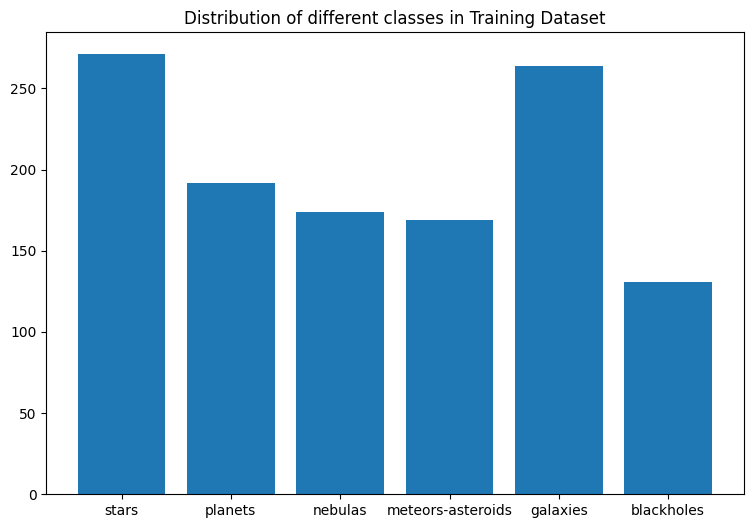

In [35]:
image_folder = ['stars', 'planets', 'nebulas', 'meteors-asteroids', 'galaxies', 'blackholes']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/celestial-bodies-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [36]:
for i in ['stars', 'planets', 'nebulas', 'meteors-asteroids', 'galaxies', 'blackholes']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/celestial-bodies-data/train/'+i+'/'))))

Training stars images are: 271
Training planets images are: 192
Training nebulas images are: 174
Training meteors-asteroids images are: 169
Training galaxies images are: 264
Training blackholes images are: 131


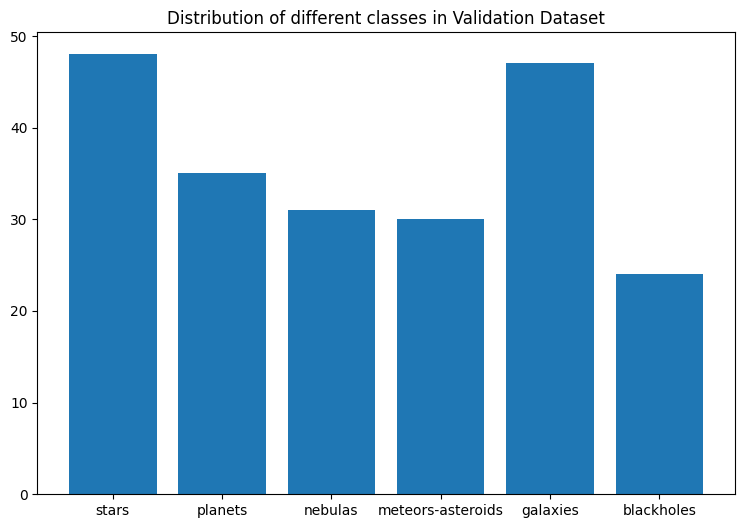

In [37]:
image_folder = ['stars', 'planets', 'nebulas', 'meteors-asteroids', 'galaxies', 'blackholes']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/celestial-bodies-data//validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [38]:
for i in ['stars', 'planets', 'nebulas', 'meteors-asteroids', 'galaxies', 'blackholes']:
    print('Validation {} images are: '.format(i)+str(len(os.listdir('/content/celestial-bodies-data/validation/'+i+'/'))))

Validation stars images are: 48
Validation planets images are: 35
Validation nebulas images are: 31
Validation meteors-asteroids images are: 30
Validation galaxies images are: 47
Validation blackholes images are: 24


In [39]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [40]:
img_width=256; img_height=256
batch_size=16

In [41]:
TRAINING_DIR = '/content/celestial-bodies-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1197 images belonging to 6 classes.


In [42]:
VALIDATION_DIR = '/content/celestial-bodies-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 215 images belonging to 6 classes.


In [43]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [44]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [45]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

In [47]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/30
75/75 [==============================] - ETA: 0s - loss: 1.1827 - accuracy: 0.4553

75/75 [==============================] - 24s 327ms/step - loss: 1.1827 - accuracy: 0.4553 - val_loss: 1.4025 - val_accuracy: 0.4140
Epoch 2/30
75/75 [==============================] - ETA: 0s - loss: 1.2108 - accuracy: 0.4645

75/75 [==============================] - 22s 299ms/step - loss: 1.2108 - accuracy: 0.4645 - val_loss: 1.3502 - val_accuracy: 0.3721
Epoch 3/30
75/75 [==============================] - ETA: 0s - loss: 1.1763 - accuracy: 0.4662

75/75 [==============================] - 25s 327ms/step - loss: 1.1763 - accuracy: 0.4662 - val_loss: 1.3330 - val_accuracy: 0.3907
Epoch 4/30
75/75 [==============================] - ETA: 0s - loss: 1.1767 - accuracy: 0.4845

75/75 [==============================] - 24s 320ms/step - loss: 1.1767 - accuracy: 0.4845 - val_loss: 1.3954 - val_accuracy: 0.3302
Epoch 5/30
75/75 [==============================] - ETA: 0s - loss: 1.1841 - accuracy: 0.4695

75/75 [==============================] - 24s 320ms/step - loss: 1.1841 - accuracy: 0.4695 - val_loss: 1.2899 - val_accuracy: 0.4651
Epoch 6/30
75/75 [==============================] - ETA: 0s - loss: 1.1214 - accuracy: 0.5113

75/75 [==============================] - 23s 303ms/step - loss: 1.1214 - accuracy: 0.5113 - val_loss: 1.4046 - val_accuracy: 0.4140
Epoch 7/30
75/75 [==============================] - ETA: 0s - loss: 1.1730 - accuracy: 0.4845

75/75 [==============================] - 24s 315ms/step - loss: 1.1730 - accuracy: 0.4845 - val_loss: 1.2847 - val_accuracy: 0.4698
Epoch 8/30
75/75 [==============================] - ETA: 0s - loss: 1.1639 - accuracy: 0.4820

75/75 [==============================] - 24s 326ms/step - loss: 1.1639 - accuracy: 0.4820 - val_loss: 1.2598 - val_accuracy: 0.4605
Epoch 9/30
75/75 [==============================] - ETA: 0s - loss: 1.1043 - accuracy: 0.5138

75/75 [==============================] - 24s 323ms/step - loss: 1.1043 - accuracy: 0.5138 - val_loss: 1.3010 - val_accuracy: 0.4698
Epoch 10/30
75/75 [==============================] - ETA: 0s - loss: 1.1296 - accuracy: 0.5163

75/75 [==============================] - 24s 319ms/step - loss: 1.1296 - accuracy: 0.5163 - val_loss: 1.3244 - val_accuracy: 0.4791
Epoch 11/30
75/75 [==============================] - ETA: 0s - loss: 1.1097 - accuracy: 0.5088

75/75 [==============================] - 24s 318ms/step - loss: 1.1097 - accuracy: 0.5088 - val_loss: 1.3032 - val_accuracy: 0.4558
Epoch 12/30
75/75 [==============================] - ETA: 0s - loss: 1.1274 - accuracy: 0.5163

75/75 [==============================] - 22s 297ms/step - loss: 1.1274 - accuracy: 0.5163 - val_loss: 1.2590 - val_accuracy: 0.4791
Epoch 13/30
75/75 [==============================] - ETA: 0s - loss: 1.0725 - accuracy: 0.5706

75/75 [==============================] - 24s 321ms/step - loss: 1.0725 - accuracy: 0.5706 - val_loss: 1.2502 - val_accuracy: 0.4558
Epoch 14/30
75/75 [==============================] - ETA: 0s - loss: 1.0471 - accuracy: 0.5689

75/75 [==============================] - 24s 321ms/step - loss: 1.0471 - accuracy: 0.5689 - val_loss: 1.2416 - val_accuracy: 0.5116
Epoch 15/30
75/75 [==============================] - ETA: 0s - loss: 1.0612 - accuracy: 0.5689

75/75 [==============================] - 25s 328ms/step - loss: 1.0612 - accuracy: 0.5689 - val_loss: 1.1993 - val_accuracy: 0.4884
Epoch 16/30
75/75 [==============================] - ETA: 0s - loss: 1.0306 - accuracy: 0.5881

75/75 [==============================] - 23s 310ms/step - loss: 1.0306 - accuracy: 0.5881 - val_loss: 1.2593 - val_accuracy: 0.4837
Epoch 17/30
75/75 [==============================] - ETA: 0s - loss: 0.9992 - accuracy: 0.5823

75/75 [==============================] - 24s 325ms/step - loss: 0.9992 - accuracy: 0.5823 - val_loss: 1.3149 - val_accuracy: 0.4558
Epoch 18/30
75/75 [==============================] - ETA: 0s - loss: 1.1027 - accuracy: 0.5313

75/75 [==============================] - 22s 299ms/step - loss: 1.1027 - accuracy: 0.5313 - val_loss: 1.3419 - val_accuracy: 0.4465
Epoch 19/30
75/75 [==============================] - ETA: 0s - loss: 1.0276 - accuracy: 0.5748

75/75 [==============================] - 24s 318ms/step - loss: 1.0276 - accuracy: 0.5748 - val_loss: 1.3444 - val_accuracy: 0.4977
Epoch 20/30
75/75 [==============================] - ETA: 0s - loss: 0.9896 - accuracy: 0.5940

75/75 [==============================] - 23s 302ms/step - loss: 0.9896 - accuracy: 0.5940 - val_loss: 1.2148 - val_accuracy: 0.5116
Epoch 21/30
75/75 [==============================] - ETA: 0s - loss: 0.9728 - accuracy: 0.6241

75/75 [==============================] - 23s 304ms/step - loss: 0.9728 - accuracy: 0.6241 - val_loss: 1.2080 - val_accuracy: 0.5116
Epoch 22/30
75/75 [==============================] - ETA: 0s - loss: 0.9805 - accuracy: 0.5890

75/75 [==============================] - 24s 323ms/step - loss: 0.9805 - accuracy: 0.5890 - val_loss: 1.1641 - val_accuracy: 0.5488
Epoch 23/30
75/75 [==============================] - ETA: 0s - loss: 0.9610 - accuracy: 0.6132

75/75 [==============================] - 23s 302ms/step - loss: 0.9610 - accuracy: 0.6132 - val_loss: 1.3446 - val_accuracy: 0.4605
Epoch 24/30
75/75 [==============================] - ETA: 0s - loss: 0.9853 - accuracy: 0.5840

75/75 [==============================] - 24s 326ms/step - loss: 0.9853 - accuracy: 0.5840 - val_loss: 1.2212 - val_accuracy: 0.5302
Epoch 25/30
75/75 [==============================] - ETA: 0s - loss: 0.9523 - accuracy: 0.6048

75/75 [==============================] - 25s 330ms/step - loss: 0.9523 - accuracy: 0.6048 - val_loss: 1.2466 - val_accuracy: 0.4930
Epoch 26/30
75/75 [==============================] - ETA: 0s - loss: 0.9365 - accuracy: 0.6190

75/75 [==============================] - 24s 322ms/step - loss: 0.9365 - accuracy: 0.6190 - val_loss: 1.2737 - val_accuracy: 0.5163
Epoch 27/30
75/75 [==============================] - ETA: 0s - loss: 0.9258 - accuracy: 0.6433

75/75 [==============================] - 25s 333ms/step - loss: 0.9258 - accuracy: 0.6433 - val_loss: 1.2676 - val_accuracy: 0.5302
Epoch 28/30
75/75 [==============================] - ETA: 0s - loss: 0.9604 - accuracy: 0.6057

75/75 [==============================] - 25s 333ms/step - loss: 0.9604 - accuracy: 0.6057 - val_loss: 1.3547 - val_accuracy: 0.4698
Epoch 29/30
75/75 [==============================] - ETA: 0s - loss: 0.9349 - accuracy: 0.6257

75/75 [==============================] - 22s 297ms/step - loss: 0.9349 - accuracy: 0.6257 - val_loss: 1.3165 - val_accuracy: 0.5116
Epoch 30/30
75/75 [==============================] - ETA: 0s - loss: 0.9322 - accuracy: 0.6291

75/75 [==============================] - 24s 320ms/step - loss: 0.9322 - accuracy: 0.6291 - val_loss: 1.2446 - val_accuracy: 0.5442


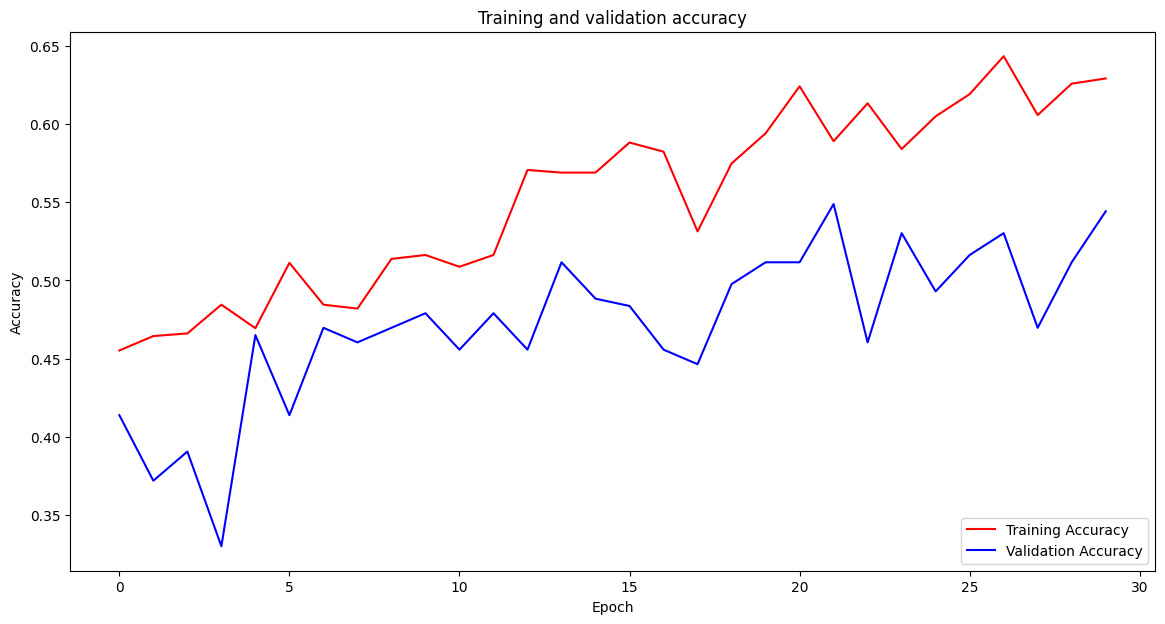

In [48]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

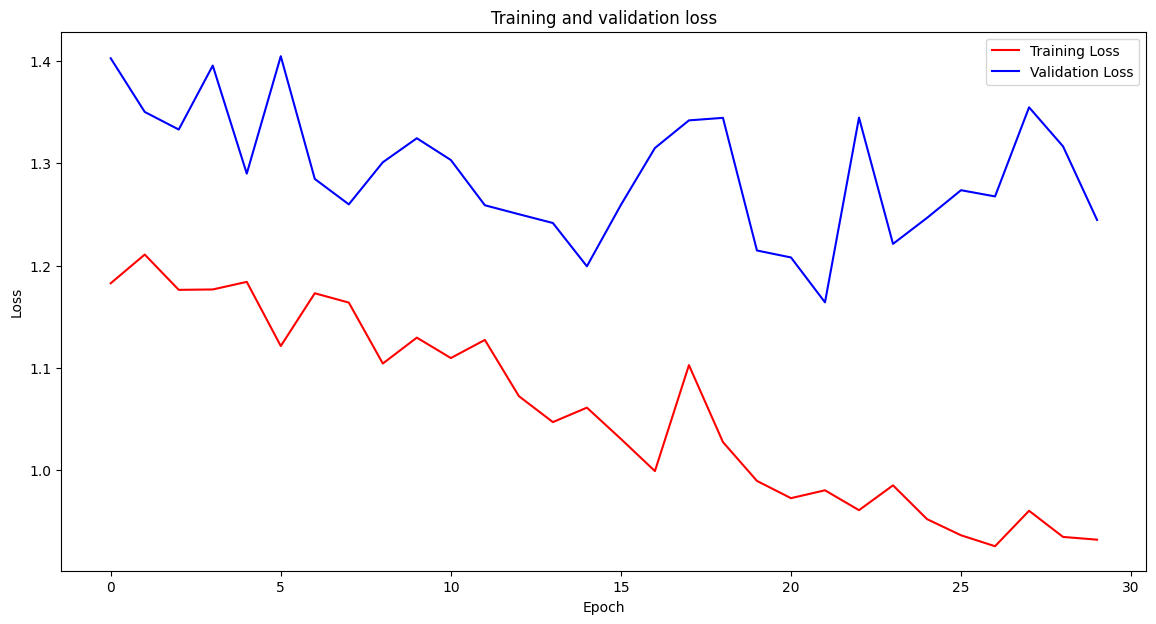

In [49]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [50]:
# performance on test data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [53]:
# Read Test Images Dir and their labels
test_images_dir = '/content/test-data/test/'
test_df = pd.read_csv('/content/test-data/test.csv')

# put them in a list
test_dfToList = test_df['image_ID'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [55]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)

27/27 [==============================] - 0s 3ms/step


In [62]:
# Mapear los índices a los nombres de las clases
class_predictions = [classes[idx] for idx in answer]

print(class_predictions)

['stars', 'galaxies', 'meteors-asteroids', 'stars', 'meteors-asteroids', 'meteors-asteroids', 'meteors-asteroids', 'meteors-asteroids', 'galaxies', 'planets', 'planets', 'blackholes', 'planets', 'planets', 'planets', 'planets', 'planets', 'galaxies', 'galaxies', 'galaxies', 'galaxies', 'galaxies', 'nebulas', 'stars', 'nebulas', 'nebulas', 'nebulas']


In [59]:
# array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
# answer = np.argmax(array, axis=1)
# print(answer)

In [61]:
test_df = pd.read_csv('/content/test-data/test.csv')
y_true = test_df['#labels']
y_pred = array
print(y_true)

0            blackholes
1            blackholes
2            blackholes
3            blackholes
4               planets
5               planets
6               planets
7               planets
8               nebulas
9               nebulas
10              nebulas
11              nebulas
12             galaxies
13             galaxies
14             galaxies
15             galaxies
16             galaxies
17                stars
18                stars
19                stars
20                stars
21                stars
22    meteors-asteroids
23    meteors-asteroids
24    meteors-asteroids
25    meteors-asteroids
26    meteors-asteroids
Name: #labels, dtype: object


In [63]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [80]:
# from sklearn.metrics import confusion_matrix
# conf_mat = confusion_matrix(y_true, answer)
# conf_mat

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np

In [72]:
y_true = np.array(['blackholes', 'blackholes', 'blackholes', 'blackholes',
                   'planets', 'planets', 'planets', 'planets',
                   'nebulas', 'nebulas', 'nebulas', 'nebulas',
                   'galaxies', 'galaxies', 'galaxies', 'galaxies', 'galaxies',
                   'stars', 'stars', 'stars', 'stars', 'stars',
                   'meteors-asteroids', 'meteors-asteroids', 'meteors-asteroids', 'meteors-asteroids', 'meteors-asteroids'])

# Etiquetas predichas
y_pred = np.array(['stars', 'galaxies', 'meteors-asteroids', 'stars',
                   'meteors-asteroids', 'meteors-asteroids', 'meteors-asteroids', 'meteors-asteroids',
                   'galaxies', 'planets', 'planets', 'blackholes',
                   'planets', 'planets', 'planets', 'planets', 'planets',
                   'galaxies', 'galaxies', 'galaxies', 'galaxies', 'galaxies',
                   'nebulas', 'stars', 'nebulas', 'nebulas', 'nebulas'])

In [73]:
# Calcular la precisión
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.00


In [74]:
# Crear una matriz de confusión para visualizar los resultados
conf_matrix = confusion_matrix(y_true, y_pred)

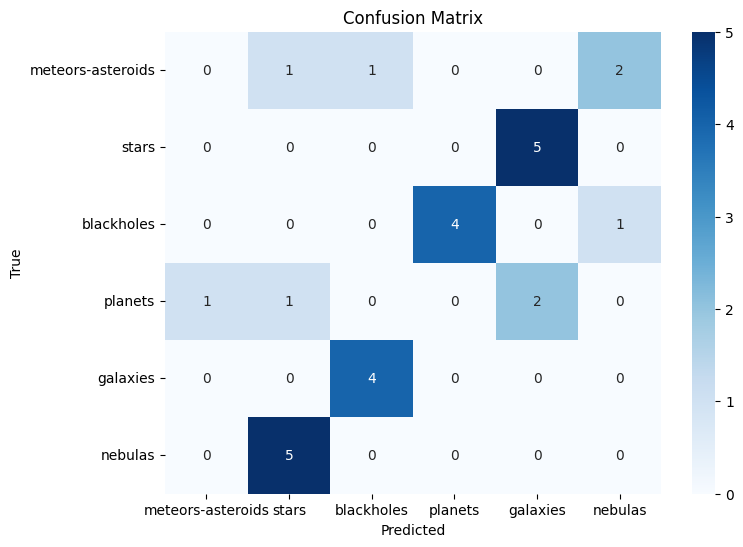

In [76]:
# Crear un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [77]:
# train_dir = '/content/celestial-bodies-data/train/'
# classes = os.listdir(train_dir)

In [78]:
# import itertools
# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Reds):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         cm = cm.round(2)
#         #print("Normalized confusion matrix")
#     else:
#         cm=cm
#         #print('Confusion matrix, without normalization')

#     #print(cm)

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

In [79]:
# np.set_printoptions(precision=2)

# fig1 = plt.figure(figsize=(7,6))
# plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
# plt.show()